In [41]:
# Load required matplotlib tools
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LinearLocator

# Load required math tools
from sympy import *
from astropy.coordinates import spherical_to_cartesian
#import scipy.integrate as integrate
import numpy as np

# Import special functions 
import scipy.special as spe

# Load required constants
from astropy.constants import h, c, a0, hbar, m_e
import astropy.units as u

# Increase resolution for retina display
%config InlineBackend.figure_format = 'retina'

# Load interactive widgets
import ipywidgets as widgets

# Setting default graph parameters
#plt.rcParams["figure.dpi"] = 2000
plt.rcParams["savefig.dpi"] = 2000
plt.rcParams["savefig.format"] = "pdf"
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["legend.edgecolor"] = "k"
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["axes.labelsize"] = "xx-large"
plt.rcParams["axes.labelpad"] = 10
plt.rcParams["xtick.labelsize"] = "large"
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.labelsize"] = "large"
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 0.5

In [42]:
def psi_R(r,n=1,l=0):
    coeff = np.sqrt((2.0/n)**3 * spe.factorial(n-l-1) /(2.0*n*spe.factorial(n+l)))
    laguerre = spe.assoc_laguerre(2.0*r/n,n-l-1,2*l+1)
    return coeff * np.exp(-r/n) * (2.0*r/n)**l * laguerre

def plotRadialTheo(n=2,l=1):
    r =    np.linspace(0, 250, 10000)
    psi2 = psi_R(r,n,l)**2 * (r**2)
    rmax = n**2*(1+0.5*(1-l*(l+1)/n**2))

    fig, ax = plt.subplots(1,1,figsize=(10,5))
    ax.plot(r, psi2, lw=2, color='b')

    # Styling the plot
    ax.set_xlabel('$r [a_0]$')
    ax.set_ylabel('$R_{nl}(r)$')
    ax.set_xlim([0, 2*rmax])
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    #plt.savefig("Question2-1.pdf", dpi=2000)

def plotRadial(x, expr, n, l):
    #rmax = n**2*(1+0.5*(1-l*(l+1)/n**2))
    fig, ax = plt.subplots(1,1,figsize=(10,5))
    ax.plot(x/a0.value, P(x)*a0.value, lw=2, color='b')

    # Styling the plot
    ax.set_xlabel('$r [a_0]$')
    ax.set_ylabel('$R_{nl}(r)$')
    ax.set_xlim([0, 10])
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    #plt.savefig("Question2-1.pdf", dpi=2000)

In [43]:
theta, phi, r = Symbol("theta"), Symbol('varphi'), Symbol("r")
hBar, hnorm, a = Symbol("hbar"), Symbol("h"), Symbol("a")
k, x = Symbol("k", nonzero=True), Symbol("x")
A, b, E, m = Symbol("A"), Symbol("B"), Symbol("E"), Symbol("m")

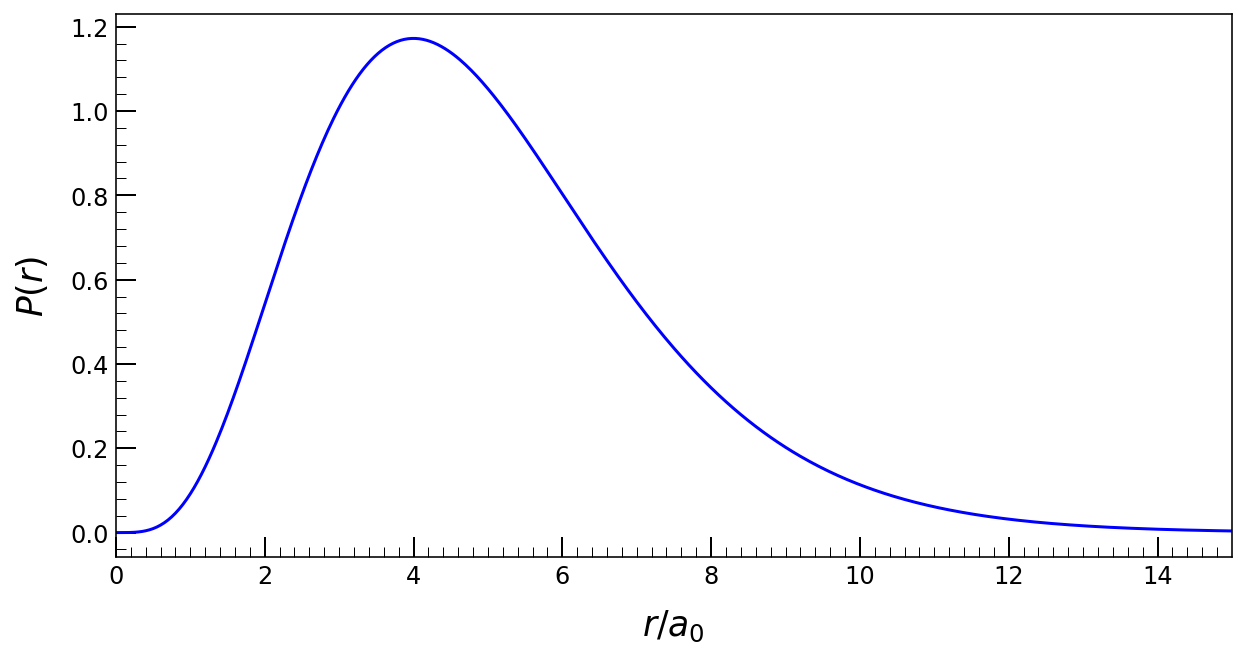

In [37]:
theta, phi, r = Symbol("theta"), Symbol('varphi'), Symbol("r")
expr = r**4*exp(-r)/4

P = lambdify(r, expr)
r = np.linspace(0, 250, 10000)

fig, ax = plt.subplots()
ax.plot(r, P(r), color='b')

# Styling the plot
ax.set_xlabel("$r/a_0$")
ax.set_ylabel('$P(r)$')
#rmax = n**2*(1+0.5*(1-l*(l+1)/n**2))

# ax.set_xlim([0, 2*rmax])
ax.set_xlim([0, 15])
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
#plt.savefig("Question2-1")

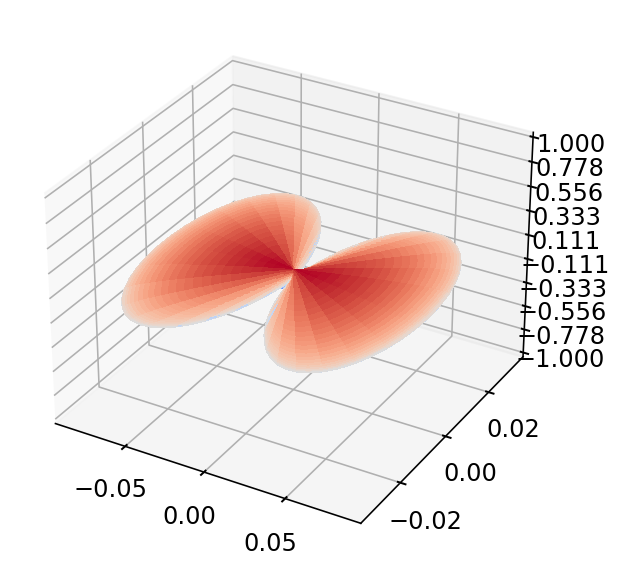

In [57]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
phi, theta = np.linspace(0, np.pi, 100), np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)
Ylm = np.cos(theta)**2/12

x = np.sin(phi) * np.cos(theta) * abs(Ylm)
y = np.sin(phi) * np.sin(theta) * abs(Ylm)
z = np.cos(phi) * abs(Ylm)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)

ax.set_zlim(-1, 1)
ax.zaxis.set_major_locator(LinearLocator(10))

